In [1]:
import eos
import numpy as np
import os
import matplotlib.pyplot as plt
import copy as _copy
import yaml
from scipy.stats import norm
from scipy import stats
eos.__version__

'1.0.15'

In [73]:
import os

os.makedirs('./plotsFF', exist_ok=True)

In [120]:
bfp, gof = eos.find_mode('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', importance_samples=True, optimizations=10)
display(bfp)
display(gof)

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/mode-defaul…

parameter,value
$f_+^{B\to \pi}(0)$,0.2480
"$b_{+, 1}^{B\to \pi}$",-1.6940
"$b_{+, 2}^{B\to \pi}$",-2.0747
"$b_{+, 3}^{B\to \pi}$",-3.2415
"$b_{0, 1}^{B\to \pi}$",0.7606
"$b_{0, 2}^{B\to \pi}$",0.2277
"$b_{0, 3}^{B\to \pi}$",0.5676
"$b_{0, 4}^{B\to \pi}$",-5.7480
$f^{B\to \pi}_T(0)$,0.2916
"$b_{T, 1}^{B\to \pi}$",-1.4542


'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/plots',))

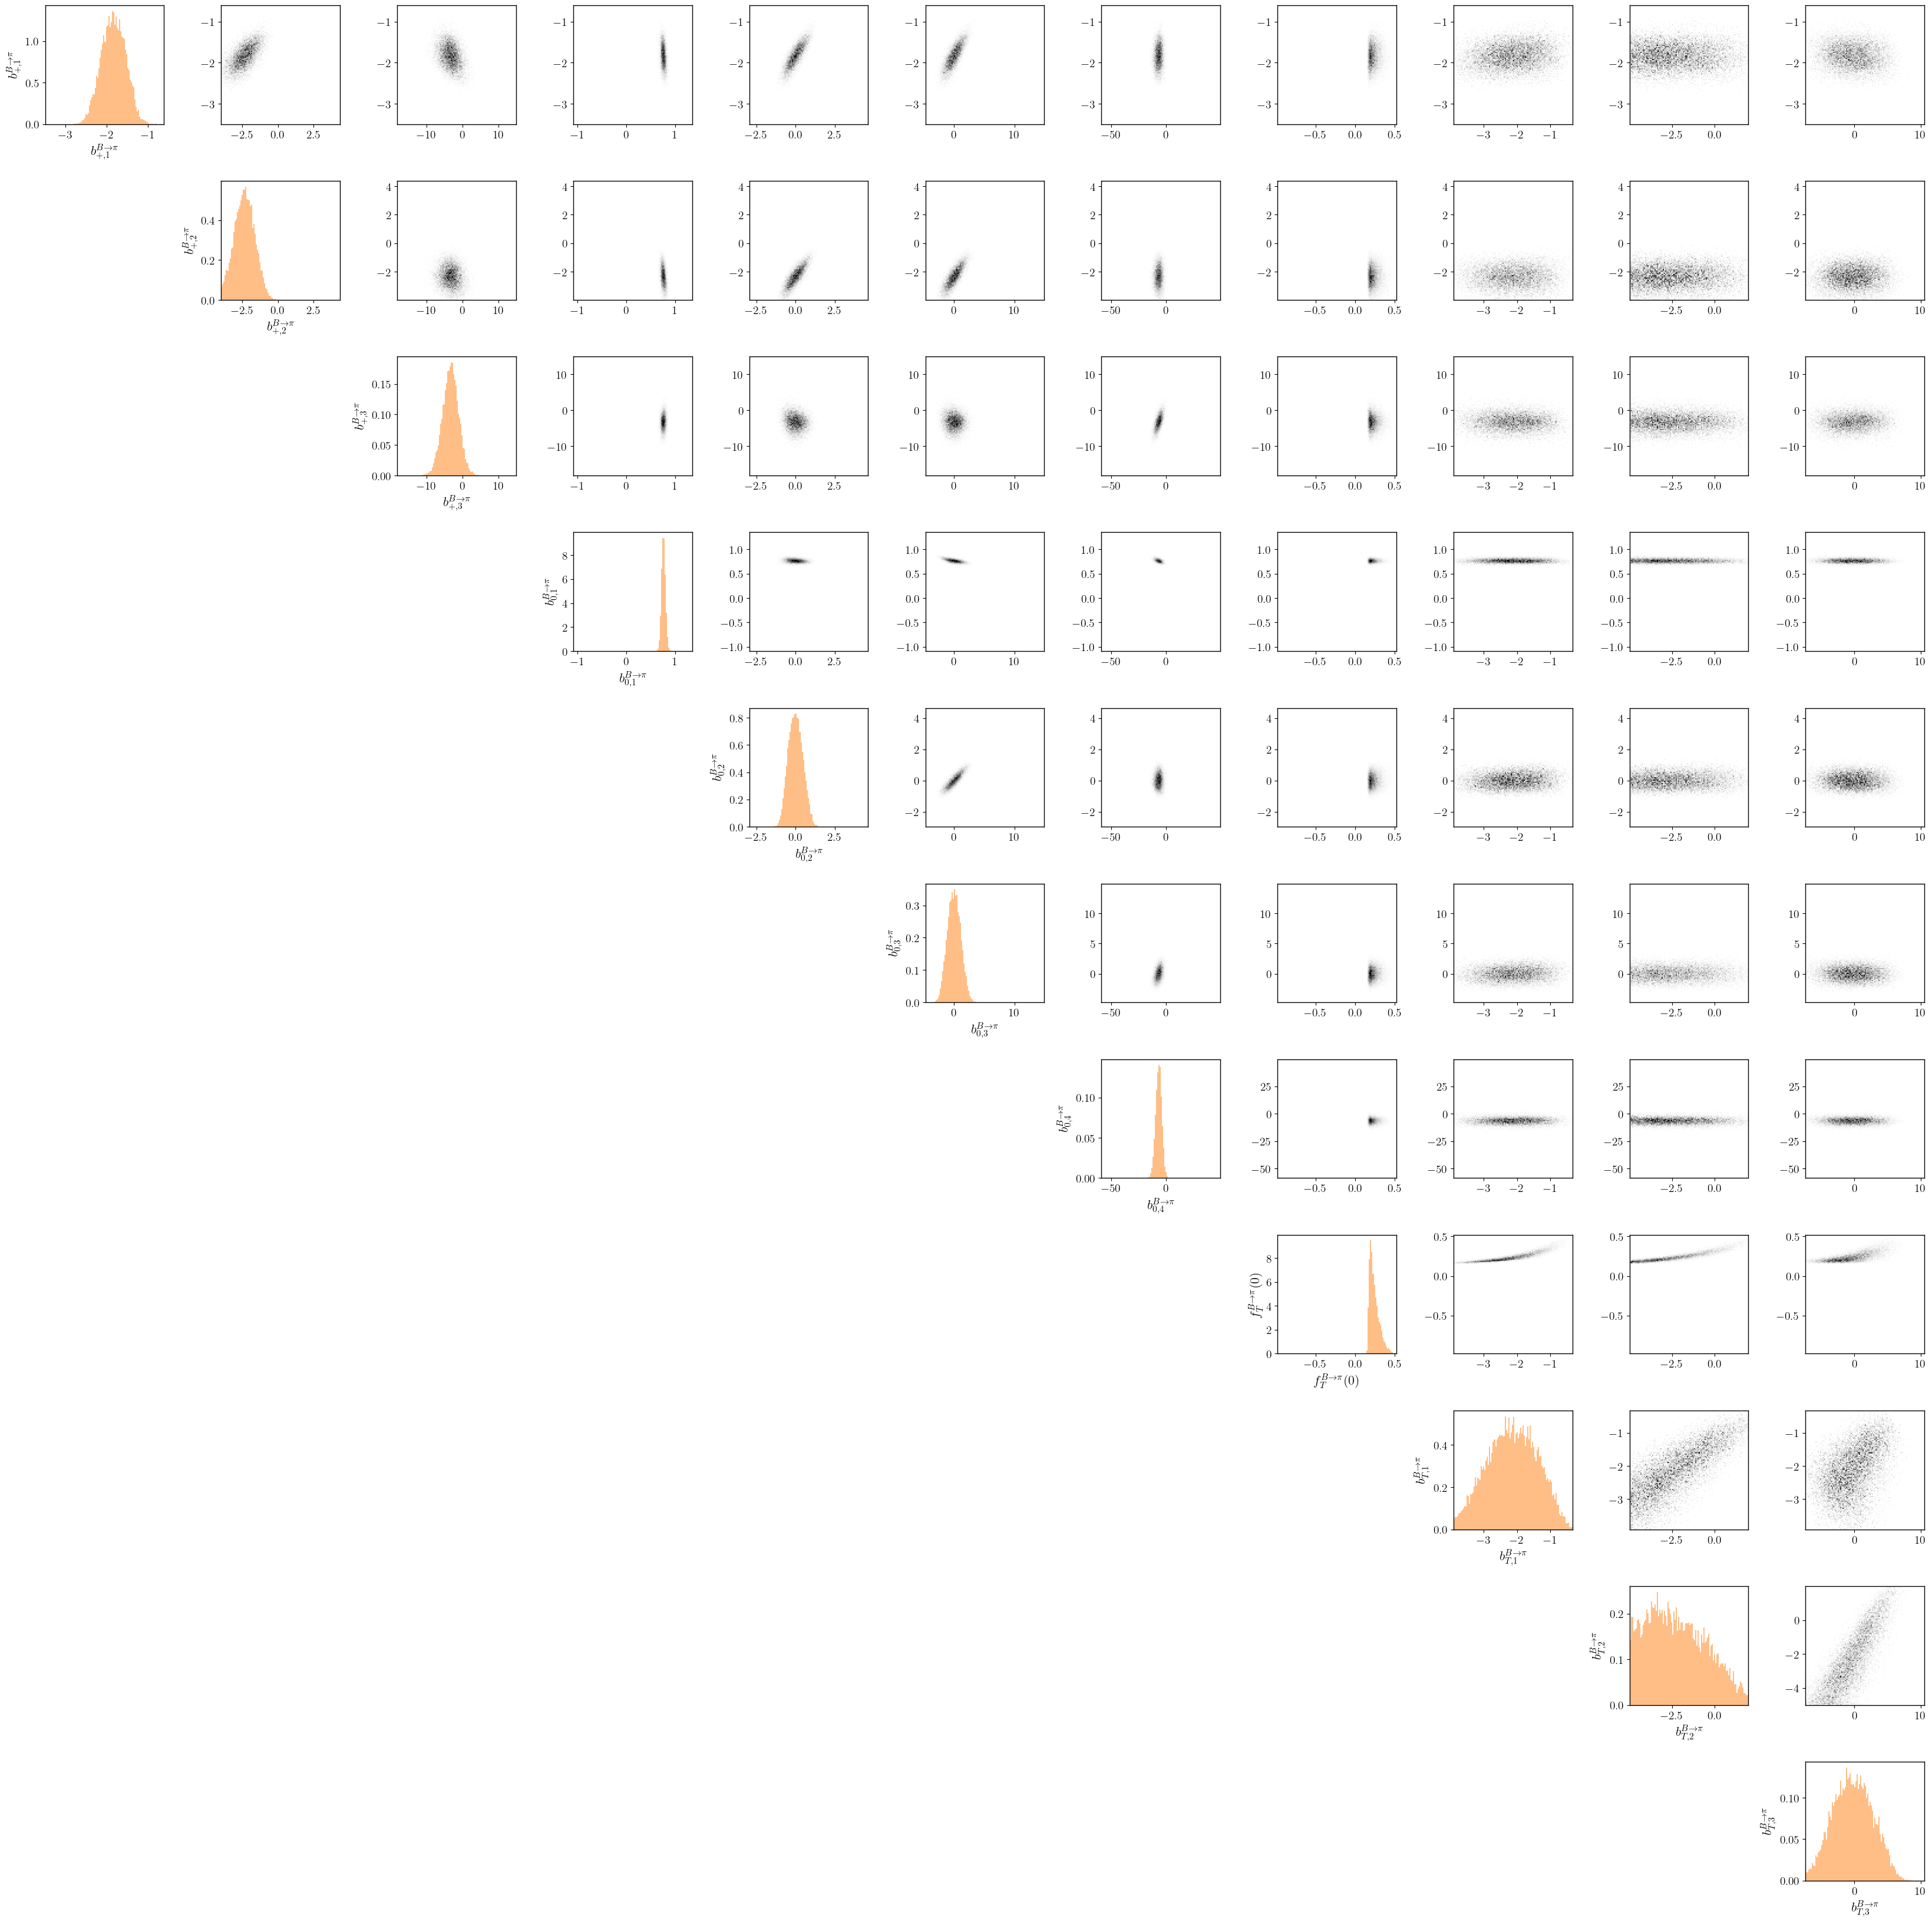

In [115]:
eos.corner_plot('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', begin=1, end=12)

In [164]:
eos.predict_observables('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', prediction = 'FFsfPlus')
eos.predict_observables('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', prediction = 'FFsfZero')
eos.predict_observables('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', prediction = 'pi-BR')
eos.predict_observables('b-to-u-l-nu.yaml', 'lattice_all', base_directory='./data', prediction = 'pi-BR-binned')

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/pred-FFsfPl…

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/pred-FFsfZe…

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/pred-pi-BR'…

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('lattice_all/pred-pi-BR-…

In [165]:

FFfPlus = eos.Prediction('./data/lattice_all/pred-FFsfPlus')
FFsfZero = eos.Prediction('./data/lattice_all/pred-FFsfZero')
BtopiBr = eos.Prediction('./data/lattice_all/pred-pi-BR')
BtopiBrbinned = eos.Prediction('./data/lattice_all/pred-pi-BR-binned')

In [ ]:
eos.Plotter._weighted_quantiles(BtopiBr.samples[:, 0],[0.15865, 0.5, 0.84135], BtopiBr.weights)
print(f'{miBtopiBr:.2f}+{(upBtopiBr-miBtopiBr):.2f}-{(miBtopiBr-loBtopiBr):.2f}')

10.06+0.83-0.75


In [145]:
Nsamples = BtopiBr.samples[:, 0].shape[0]

In [153]:
samplesexpBR = np.random.normal(1.5*pow(10,-4),0.06 * pow(10,-4), Nsamples)


In [167]:
BtopiBrbinned.samples[:, :].shape

(13453, 6)

In [ ]:
eos.Plotter._weighted_quantiles(BtopiBr.samples[:, 0],[0.15865, 0.5, 0.84135], BtopiBr.weights)

In [157]:
loVub, miVub, upVub = eos.Plotter._weighted_quantiles((samplesexpBR/BtopiBr.samples[:, 0])**0.5,[0.15865, 0.5, 0.84135], BtopiBr.weights)
print(f'{pow(10,3)*miVub:.2f}+{pow(10,3)*(upVub-miVub):.2f}-{pow(10,3)*(miVub-loVub):.2f}')


3.86+0.17-0.16


In [123]:

af = eos.AnalysisFile('./b-to-u-l-nu.yaml')

'parameters' is in the description of prior component 'FF-pi', use 'descriptions' instead


In [109]:
prova = af.predictions['FFsfPlus'].observables

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$f^{B\\to\\pi}(q^2)$ '>)

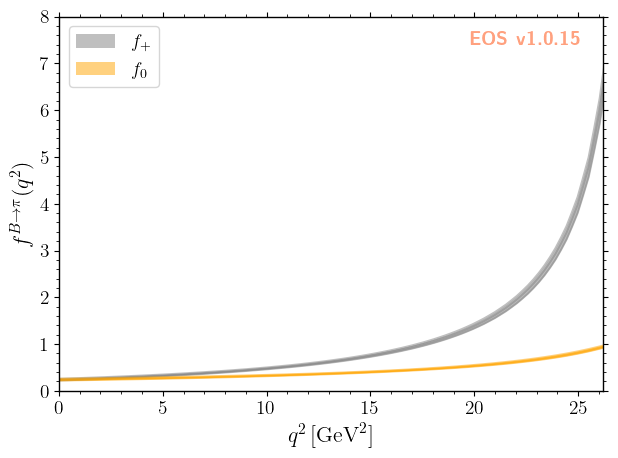

In [110]:

plotRes_argsfPlus = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$',  'range': [0, 26.2] },
        'y': { 'label': r'$f^{B\to\pi}(q^2)$ ', 'range': [0.0, 8] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'$f_+$', 'color': 'gray',
            'type': 'uncertainty',
            'data': { 'samples': FFfPlus.samples, 'weights': FFfPlus.weights,
                      'xvalues': [ks["q2"] for ks in prova[0].kinematics]},
        },
        {
            'label': r'$f_0$', 'color': 'orange',
            'type': 'uncertainty',
            'data': { 'samples': FFsfZero.samples, 'weights': FFsfZero.weights,
                      'xvalues': [ks["q2"] for ks in prova[0].kinematics]},
        },
        #{'type': 'band', 'x': (3.835, 3.87), 'color': 'lightgray'},
        #{'type': 'band', 'x': (3.7, 3.735), 'color': 'lightgray'}
    ]
}
eos.plot.Plotter(plotRes_argsfPlus, './plotsFF/fBtopi.pdf').plot()

   plotting EOS observable "B->pilnu::dBR/dq2;l=e,q=d"


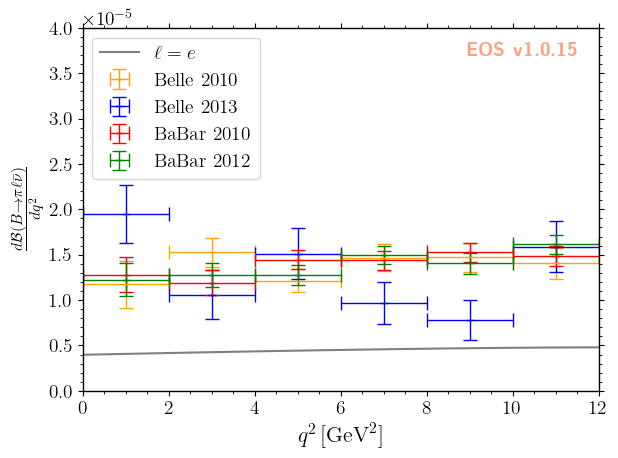

In [163]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [0.0, 12] },
        'y': { 'label': r'$\frac{d\mathcal{B}(B\to\pi\ell\bar\nu)}{dq^2}$',                    'range': [0.0,  4e-5] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        # {
        #     'label': r'$\ell=e$',
        #     'type': 'observable',
        #     'observable': 'B->Dlnu::dBR/dq2;l=e,q=d',
        #     'variable': 'q2',
        #     'color': 'black',
        #     'range': [0.02, 11.63],
        # },
        {
            'label': r'Belle 2010',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->pi^+lnu::BR@Belle:2010A',
            'observable': 'B->pilnu::BR',
            'variable': 'q2',
            'color': 'orange',
        },
        {
            'label': r'Belle 2013',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->pi^+lnu::BR@Belle:2013A',
            'observable': 'B->pilnu::BR',
            'variable': 'q2',
            'color': 'blue',
        },
        {
            'label': r'BaBar 2010',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->pi^+lnu::BR@BaBar:2010B',
            'observable': 'B->pilnu::BR',
            'variable': 'q2',
            'color': 'red',
        },
        {
            'label': r'BaBar 2012',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->pi^+lnu::BR@BaBar:2012D',
            'observable': 'B->pilnu::BR',
            'variable': 'q2',
            'color': 'green',
        },
         {
            'label': r'$\ell=e$',
            'type': 'observable',
            'observable': 'B->pilnu::dBR/dq2;l=e,q=d',
            'variable': 'q2',
            'color': 'black',
            'range': [0.02, 26],
        },
    ]
}
_ = eos.plot.Plotter(plot_args).plot()